In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
%matplotlib inline

import sympy as sp

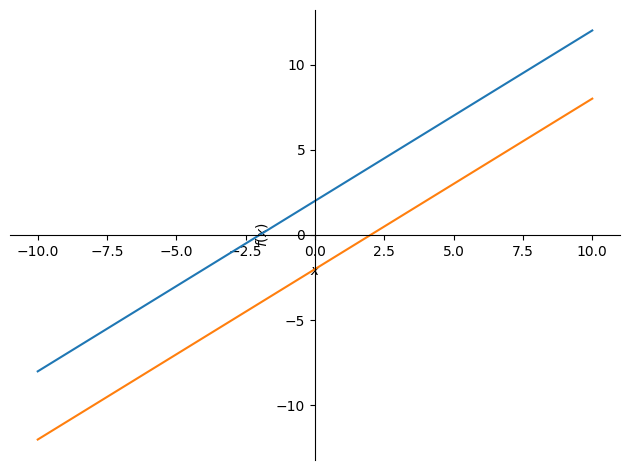

In [2]:
x = sp.Symbol('x')

a = sp.Symbol('a', constant = True)
b = sp.Symbol('b', constant = True)

f = a*x + b
g = (x - b)/a


def graficas_inversas(pendiente=1,ordenada=0):
    h_1 = f.subs(a,pendiente).subs(b,ordenada)
    h_2 = g.subs(a,pendiente).subs(b,ordenada)
    p_1 = sp.plot(h_1, show=False)
    p_2 = sp.plot(h_2, show=False)
    p_1.append(p_2[0])
    return p_1.show()

graficas_inversas(1,2)

In [16]:
def estimacion_por_normal(media_poblacional, desviacion_estandar,nivel_de_confianza, tam_muestra):
    '''
    las siguientes lineas son los limites del intervalo de confianza
    '''
    lim_infe = media_poblacional - norm.ppf((1-nivel_de_confianza)/2)*desviacion_estandar/np.sqrt(tam_muestra)
    lim_sup = media_poblacional + norm.ppf((1-nivel_de_confianza)/2)*desviacion_estandar/np.sqrt(tam_muestra)
    #Regresamos el intervalo de confianza.
    return lim_infe, lim_sup

In [18]:
 norm.ppf((1-.9973)/2)

-2.999976992703389

In [17]:
media_poblacional = 1550
desviacion_estandar = 30
nivel_de_confianza = .95
tam_muestra = 50

estimacion_por_normal(1550,30,.95,50)

(1558.3154229460981, 1541.6845770539019)

In [19]:
norm.interval(.95, 1550, 30/np.sqrt(50))    

(1541.6845770539019, 1558.3154229460981)

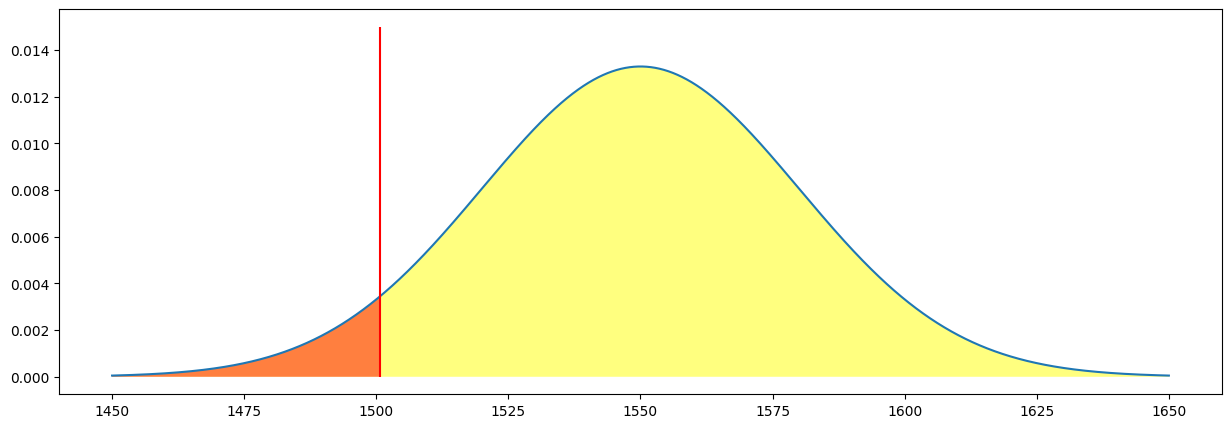

In [6]:
x = np.arange(1450,1650,.001)
y = norm.pdf(x,loc = 1550, scale=30)

z_1 = norm.ppf(.05,loc = 1550, scale=30)
z_2 = -z_1

intervalo = norm.interval(.95, 1550, 30/np.sqrt(50))

x_2 = np.arange(1450,z_1,.001)
y_2 = norm.pdf(x_2, loc = 1550, scale=30)

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(x,y)

ax.fill_between(x,y, facecolor='yellow', alpha=0.5)

ax.fill_between(x_2,y_2, facecolor='red', alpha=0.5)
ax.vlines(z_1, 0, .015, colors='r')
plt.show()

In [7]:
pendiente,ordenada = 1, 2
f.subs(a,pendiente).subs(b,ordenada), g.subs(a,pendiente).subs(b,ordenada)

(x + 2, x - 2)

In [8]:
def nivel_de_confianza(probabilidad=.5):
    
    x = np.arange(-4,4,.001)
    
    y = norm.pdf(x)
    
    
    alpa_medios = (1- probabilidad)/2
    z_1 = norm.ppf(alpa_medios)
    z_2 = -z_1
    
    x_2 = np.arange(-3,z_1,.001)
    y_2 = norm.pdf(x_2)

    x_3 = np.arange(z_2,3,.001)
    y_3 = norm.pdf(x_3)

    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(x,y)
    ax.fill_between(x,y, facecolor='yellow', alpha=0.2)
    ax.fill_between(x_2,y_2, facecolor='red', alpha=0.5)

    ax.fill_between(x_3,y_3, facecolor='red', alpha=0.5)

    ax.vlines([z_1, z_2], 0, 1, transform=ax.get_xaxis_transform(), colors='r')

    ax.set_ylim([0,.45])

    return ax



<Axes: >

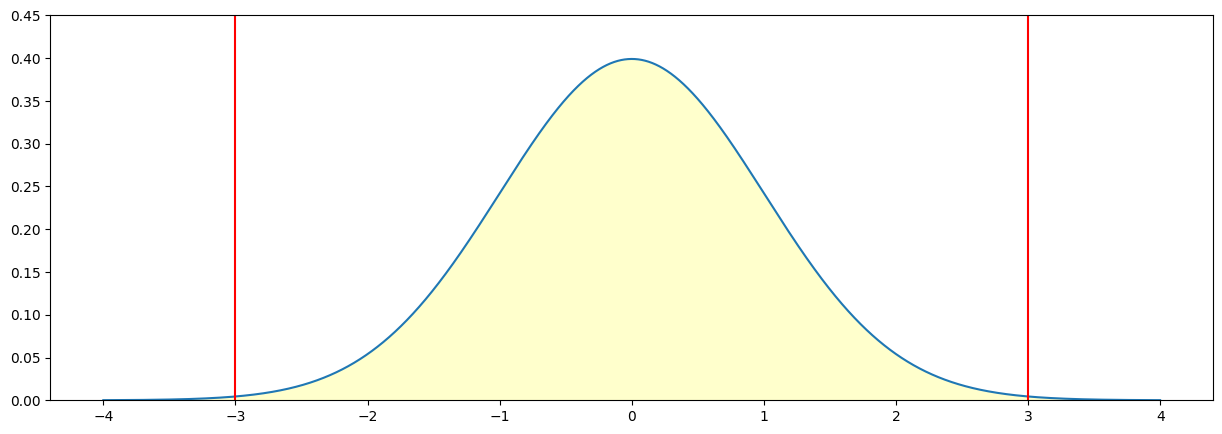

In [9]:
nivel_de_confianza(.9973)

<Axes: >

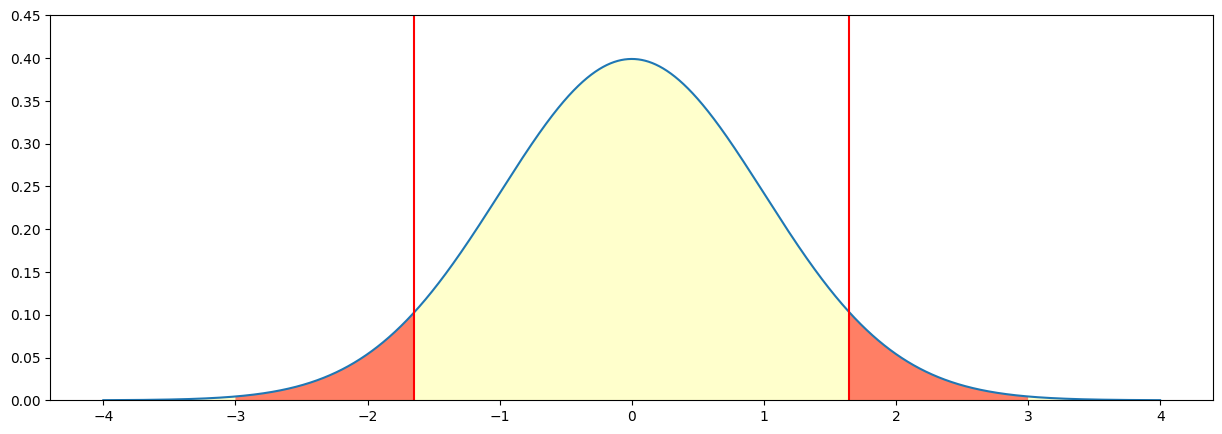

In [10]:
nivel_de_confianza(.90)

<Axes: >

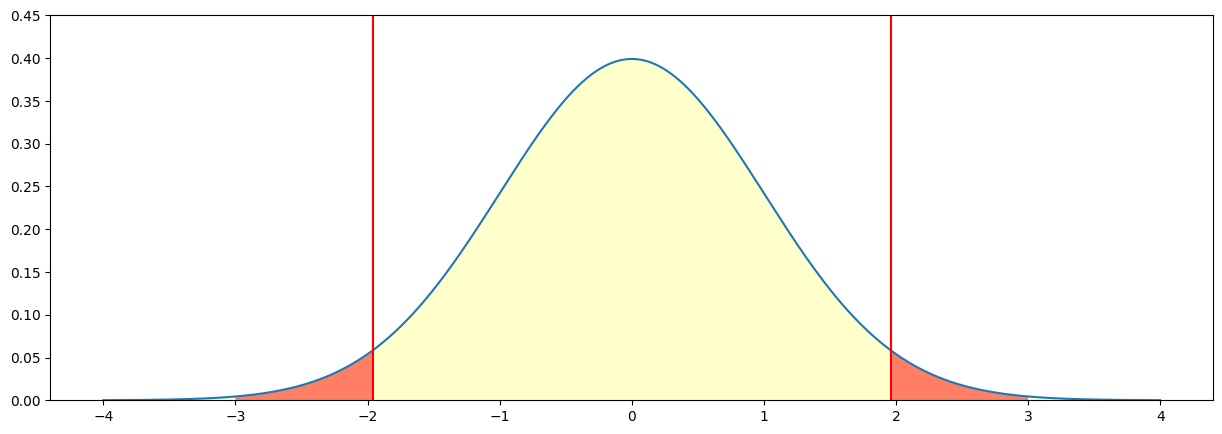

In [11]:
nivel_de_confianza(.95)

<Axes: >

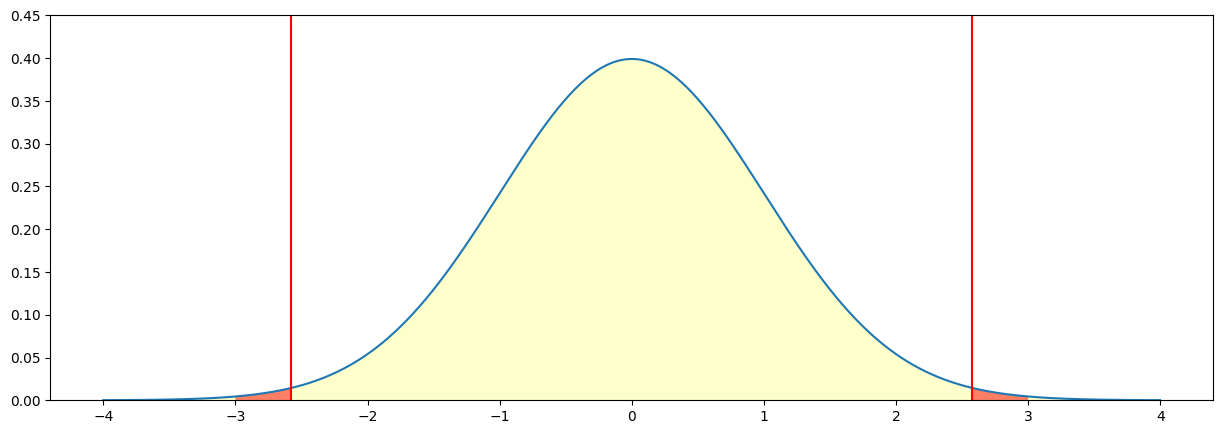

In [12]:
nivel_de_confianza(.99)

In [3]:
def area_bajo_la_curva(area=.5):
    
    # Dominio en general
    x = np.arange(-3,3,.001)
    # La campana gaussiana completa
    y = norm.pdf(x)
    
    # El rango del area bajo la curva
    x_2 = np.arange(-3,norm.ppf(area),.001)
    y_2 = norm.pdf(x_2)
    
    z = norm.cdf(x)
    l = norm.ppf(z)
    
    fig, (vax, hax, lax) = plt.subplots(1, 3, figsize=(12, 6))
    
    vax.plot(x,y)
    vax.fill_between(x,y, facecolor = 'gray', alpha = 0.1)
    vax.fill_between(x_2,y_2, facecolor = 'red', alpha = 0.5)

    hax.plot(x,z)
    hax.vlines(norm.ppf(area),area - .05,area + .05, colors='r')
    hax.plot(norm.ppf(area),area, marker ="o", markersize=8)
        
    lax.plot(z,l)
    lax.plot(area,norm.ppf(area), marker ="o", markersize=8)
    return vax, hax



(<Axes: >, <Axes: >)

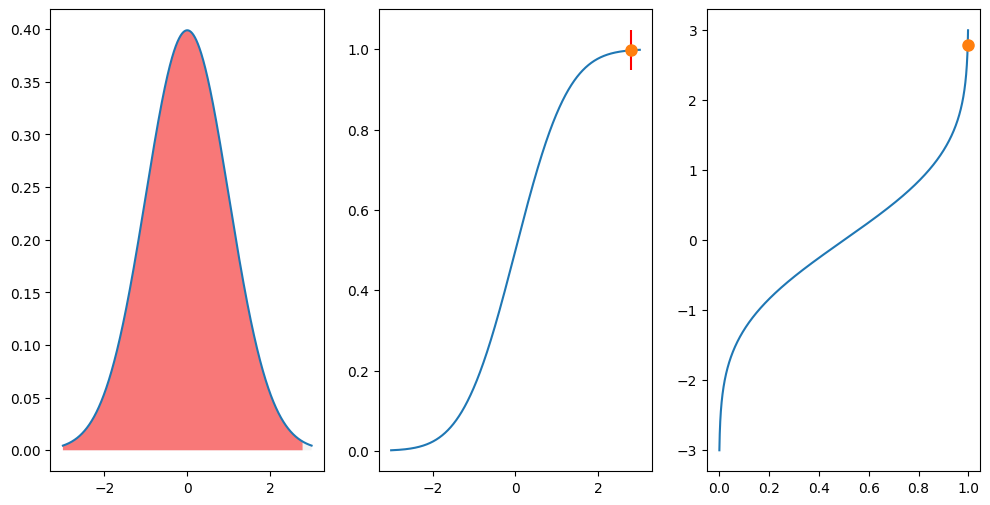

In [7]:
area_bajo_la_curva(.9973)

(<Axes: >, <Axes: >)

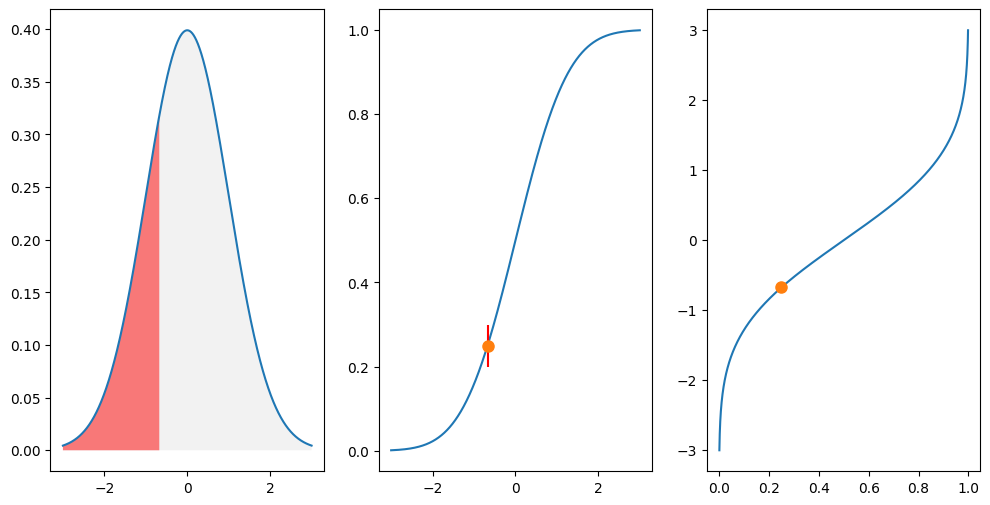

In [15]:
area_bajo_la_curva(.25)

(<Axes: >, <Axes: >)

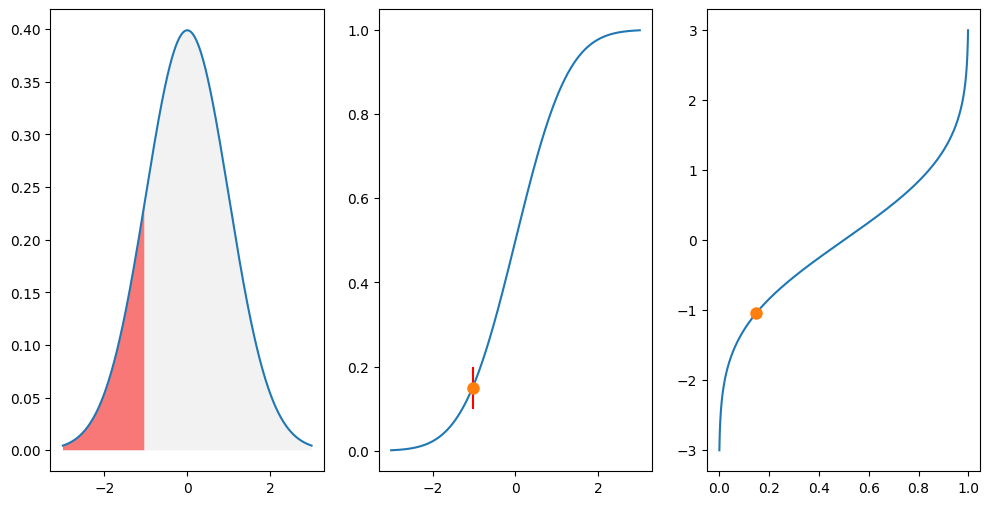

In [16]:
area_bajo_la_curva(.15)

In [17]:
intervalo = norm.interval(.95, 1550, 30/np.sqrt(50))
intervalo

(1541.6845770539019, 1558.3154229460981)

In [18]:
def binomial(probabilidad = .5, lanzamientos=100):
    x = np.arange(1,lanzamientos+1)
    y = binom.pmf(x,lanzamientos,probabilidad)
    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(x, y, 'b:')
    return plt.show()


def error(d=.128,probabilidad = .5):
    x = np.arange(1,101) 
    y = binom.pmf(x,100,probabilidad)

    z = []
    for i in x:
        z.append()
    return z

error(probabilidad = .8)

TypeError: list.append() takes exactly one argument (0 given)

Se tiene una distribución Bernouli de parámetro $p$. Se desea obtener el intervalo de confianza del $90\%$ para $p$ tal que la longitud del intervalo sea a lo sumo $.05$.¿Qué tamaño de la muestra debe tomarse?

$$ \varepsilon = Z_{\alpha}*\sqrt{ \frac{p'*(1-p')}{n}}$$

In [47]:
def longitud(probabilidad=.90,tam_muestra=10):
    x = norm.ppf((1-probabilidad)/2)
    longitud = x**2/(x**2+tam_muestra)
    return longitud

def error(err=.05,probabilidad=.90,tam_muestra=10):
    x = tam_muestra
    while longitud(tam_muestra= x) > err:
        x+=1
    return x+1
# 1075

In [49]:
 longitud(tam_muestra=53), error()

(0.04856865737832608, 53)

In [45]:
x=10
x+=11
x

21